Investment strategy brainstorm
- ROI: begin with 100 dollars and see how it goes

In [31]:
from firebase import firebase
import json
import pandas as pd
import numpy as np
from collections import deque

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


from datetime import timedelta
import datetime
#import missingno as msno
import tensorflow as tf
import IPython 
import IPython.display
from scipy import stats

In [5]:
my_firebase = firebase.FirebaseApplication('https://test-random-305921-default-rtdb.firebaseio.com/', None)
trades=my_firebase.get('/websocket_trades_v1_2021-03-12', '')
df=pd.DataFrame(trades).T.reset_index(drop=True)
#datatypes
df.time=pd.to_datetime(df.time)
df["price"] = df.price.astype(float)
df["last_size"] = df['last_size'].astype(float)
df["best_bid"] = df['best_bid'].astype(float)
df["best_ask"] = df['best_ask'].astype(float)
df['bid_ask_spread']=df['best_ask']-df['best_bid']
df['tfi'] = np.where(df['side'] == 'buy', df['last_size'], -df['last_size'])
print(df.shape)
df.head()


(78021, 15)


,best_ask,best_bid,high_24h,last_size,low_24h,open_24h,price,product_id,sequence,side,time,trade_id,type,volume_24h,volume_30d
0,57423.23,57419.99,58113,0.002903,55050,57527.51,57423.23,BTC-USD,22637372049,buy,2021-03-12 18:51:21.986589+00:00,144106022,ticker,23239.10554988,728721.92359102
1,57424.56,57424.55,58113,0.006150,55050,57527.51,57424.55,BTC-USD,22637372497,sell,2021-03-12 18:51:22.875002+00:00,144106023,ticker,23239.11169988,728721.92974102
2,57425.61,57424.55,58113,0.001096,55050,57527.51,57424.56,BTC-USD,22637372583,buy,2021-03-12 18:51:23.158075+00:00,144106024,ticker,23239.11279604,728721.93083718
3,57425.61,57424.55,58113,0.003173,55050,57527.51,57425.61,BTC-USD,22637372585,buy,2021-03-12 18:51:23.158075+00:00,144106025,ticker,23239.11596886,728721.93401000
4,57426.73,57425.60,58113,0.006327,55050,57527.51,57425.61,BTC-USD,22637372772,buy,2021-03-12 18:51:23.662085+00:00,144106026,ticker,23239.12229604,728721.94033718


In [19]:
sum(df[100:200]['tfi'])

4.54382229

In [125]:
print(np.mean(tfis))
print(np.std(tfis))
print(min(tfis))
print(stats.describe(tfis))

-0.061402280229078184
3.8169632424715667
-31.70984907000001
DescribeResult(nobs=77921, minmax=(-31.70984907000001, 26.332942320000004), mean=-0.061402280229078184, variance=14.569395370872824, skewness=-0.5364365102640641, kurtosis=8.187116601734829)


(array([5.3000e+01, 8.5000e+01, 3.4200e+02, 1.4960e+03, 1.0417e+04,
        5.5932e+04, 8.5410e+03, 7.9700e+02, 1.8600e+02, 7.2000e+01]),
 array([-31.70984907, -25.90556993, -20.10129079, -14.29701165,
         -8.49273251,  -2.68845338,   3.11582576,   8.9201049 ,
         14.72438404,  20.52866318,  26.33294232]),
 <BarContainer object of 10 artists>)

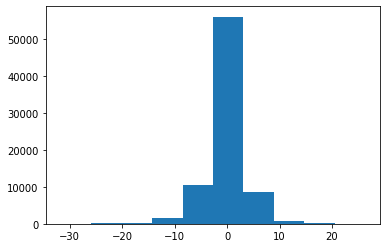

In [126]:
plt.hist(tfis)

In [131]:
def tfi_strategy(window_size=100):
    tfis=[]
    trade_current=False
    prices_buy=[]
    prices_sell=[]
    rois=[]

    for i in range(window_size, len(df)):
        #compute tfi
        tfi=sum(df[i-window_size:i]['tfi'])
        tfis.append(tfi)

        #buy signal
        if (tfi<-8 and not trade_current): #or (abs(tfi)<.3 and not trade_current):
            price_buy=df['best_ask'][i]
            trade_current=True 
            prices_buy.append(price_buy)
        
        #sell signal
        if trade_current and df['best_bid'][i]>1.00012*price_buy:
        #if trade_current and tfi>5:
            price_sell=df['best_bid'][i]
            prices_sell.append(price_sell)
            trade_current=False
    return prices_buy, prices_sell

In [132]:
buys, sells=tfi_strategy()
print(len(buys))
print(len(sells))

rois=[]
for i in range(len(buys)-1):
    roi=sells[i]/buys[i]
    rois.append(roi)
print(np.mean(roi))

a=1
for roi in rois:
    a*=roi
print('roi', a)


16
16
1.0001897662375918
roi 1.0027314159698342


In [114]:
print(buys)
print(sells)

[57536.37, 57545.92, 57350.01, 57090.22, 57122.59, 56649.9, 56791.43, 56604.75, 56656.66, 57115.6, 57083.86, 57438.97, 57377.62]
[57545.91, 57553.88, 57360.98, 57097.54, 57134.41, 56659.11, 56799.62, 56616.35, 56664.69, 57123.99, 57091.29, 57449.99, 57385.76]


In [97]:
rois=[]
for i in range(len(buys)):
    roi=sells[i]/buys[i]
    rois.append(roi)

In [133]:
np.mean(roi)

1.0001897662375918

In [136]:
np.array([1,2])/np.array([1,2])

array([1., 1.])

In [99]:
a=1
for roi in rois:
    a*=roi

In [100]:
a

1.0020968047224672

In [ ]:
class strategy:
    def __init__:
        
        self.prices_buy=np.array()
        self.prices_sell=[]

        
    def backtest(window_size=100):
    tfis=[]
    trade_current=False
    prices_buy=[]
    prices_sell=[]
    rois=[]

    for i in range(window_size, len(df)):
        #compute tfi
        tfi=sum(df[i-window_size:i]['tfi'])
        tfis.append(tfi)

        #buy signal
        if (tfi<-8 and not trade_current): #or (abs(tfi)<.3 and not trade_current):
            price_buy=df['best_ask'][i]
            trade_current=True 
            prices_buy.append(price_buy)
        
        #sell signal
        if trade_current and df['best_bid'][i]>1.00012*price_buy:
        #if trade_current and tfi>5:
            price_sell=df['best_bid'][i]
            prices_sell.append(price_sell)
            trade_current=False
    return prices_buy, prices_sell